In [68]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [69]:
df=pd.read_csv("D:\TATAMOTORS.NS.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-11-2020,135.000000,137.399994,133.550003,134.100006,134.100006,52071476.0
1,04-11-2020,135.600006,137.000000,134.000000,135.899994,135.899994,44675934.0
2,05-11-2020,137.000000,138.000000,136.000000,137.649994,137.649994,38928602.0
3,06-11-2020,137.649994,142.300003,137.649994,139.000000,139.000000,67966815.0
4,09-11-2020,140.600006,141.500000,138.699997,141.000000,141.000000,40277460.0


In [70]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
244,28-10-2021,493.899994,493.899994,478.549988,481.049988,481.049988,25182748.0
245,29-10-2021,482.000000,491.600006,467.700012,483.700012,483.700012,31054342.0
246,01-11-2021,486.450012,489.700012,469.799988,485.700012,485.700012,34315690.0
247,02-11-2021,506.500000,510.000000,486.500000,487.850006,487.850006,51580720.0
248,03-11-2021,483.799988,495.000000,481.600006,484.899994,484.899994,22936533.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       249 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.7+ KB


In [72]:
df['Date']=pd.to_datetime(df['Date'])

In [73]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-11,135.000000,137.399994,133.550003,134.100006,134.100006,52071476.0
1,2020-04-11,135.600006,137.000000,134.000000,135.899994,135.899994,44675934.0
2,2020-05-11,137.000000,138.000000,136.000000,137.649994,137.649994,38928602.0
3,2020-06-11,137.649994,142.300003,137.649994,139.000000,139.000000,67966815.0
4,2020-09-11,140.600006,141.500000,138.699997,141.000000,141.000000,40277460.0


In [74]:
df = df[["Date","Close"]] 
# Rename the features: These names are required for the model fitting
df = df.rename(columns = {"Date":"ds","Close":"y"}) 
df.head()

,ds,y
0,2020-03-11,134.100006
1,2020-04-11,135.899994
2,2020-05-11,137.649994
3,2020-06-11,139.000000
4,2020-09-11,141.000000


In [75]:
from fbprophet import Prophet

In [76]:
kt=Prophet(daily_seasonality= True)
kt.fit(df)
future = kt.make_future_dataframe(periods=730) 
future.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds
0,2020-01-12
1,2020-02-12
2,2020-03-11
3,2020-03-12
4,2020-04-11


In [77]:
forecast=kt.predict(future)

In [78]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
974,2023-12-06,676.976411,561.896744,706.840274,676.801253,677.146708,-41.996611,-41.996611,-41.996611,-42.089905,-42.089905,-42.089905,0.093294,0.093294,0.093294,0.0,0.0,0.0,634.979800
975,2023-12-07,677.333166,564.562949,718.961074,677.157502,677.503799,-35.409869,-35.409869,-35.409869,-42.089905,-42.089905,-42.089905,6.680036,6.680036,6.680036,0.0,0.0,0.0,641.923297
976,2023-12-08,677.689922,549.764995,704.287653,677.513751,677.860890,-49.705861,-49.705861,-49.705861,-42.089905,-42.089905,-42.089905,-7.615957,-7.615957,-7.615957,0.0,0.0,0.0,627.984060
977,2023-12-09,678.046677,560.889589,710.157689,677.870024,678.217981,-42.224320,-42.224320,-42.224320,-42.089905,-42.089905,-42.089905,-0.134415,-0.134415,-0.134415,0.0,0.0,0.0,635.822357
978,2023-12-10,678.403432,564.572831,710.566561,678.226549,678.574752,-40.562203,-40.562203,-40.562203,-42.089905,-42.089905,-42.089905,1.527702,1.527702,1.527702,0.0,0.0,0.0,637.841229


In [79]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [80]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
974,2023-12-06,634.979800,561.896744,706.840274
975,2023-12-07,641.923297,564.562949,718.961074
976,2023-12-08,627.984060,549.764995,704.287653
977,2023-12-09,635.822357,560.889589,710.157689
978,2023-12-10,637.841229,564.572831,710.566561


In [81]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [82]:
plot_plotly(kt, forecast)

In [83]:
initial_days = (df.ds.max() - df.ds.min()) / np.timedelta64(1, 'D')
period_days = initial_days - 365
period_days

333.0

In [84]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(kt, initial='100 days', period='100 days', horizon='365 days')

INFO:prophet:Making 3 forecasts with cutoffs between 2020-05-24 00:00:00 and 2020-12-10 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


In [85]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-11,175.075607,157.868692,191.486245,139.000000,2020-05-24
1,2020-07-12,167.282447,151.642986,183.764159,183.550003,2020-05-24
2,2020-08-12,140.748542,123.701288,157.537179,181.800003,2020-05-24
3,2020-09-11,115.061843,97.319947,132.755402,141.000000,2020-05-24
4,2020-09-12,119.332276,102.401453,136.315379,182.699997,2020-05-24


In [86]:
cutoff = df_cv['cutoff'].unique()[0]
cutoff

numpy.datetime64('2020-05-24T00:00:00.000000000')

In [87]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head(10)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,71 days,13840.673376,117.646391,91.529888,0.305340,0.358819,0.385054,0.301887
1,72 days,13842.640665,117.654752,91.598804,0.305717,0.358819,0.385462,0.301887
2,73 days,13842.929141,117.655978,91.609588,0.306097,0.358819,0.385877,0.301887
3,74 days,14194.428558,119.140373,93.961820,0.313310,0.376896,0.395510,0.283019
4,75 days,14651.638201,121.043952,96.729208,0.321428,0.379337,0.406481,0.264151
5,76 days,15064.385170,122.737057,99.169687,0.328104,0.383297,0.415680,0.245283
6,77 days,15528.790764,124.614569,102.031297,0.336517,0.402779,0.426776,0.216981
7,78 days,15992.622358,126.461940,104.701737,0.343972,0.403364,0.436979,0.207547
8,79 days,15993.099920,126.463829,104.776788,0.344420,0.403364,0.437436,0.207547
9,80 days,16033.346393,126.622851,105.640001,0.348890,0.403364,0.443154,0.179245


In [88]:
df_p.mean().to_frame()

,0
horizon,221 days 15:45:59.124087592
mse,25513.277205
rmse,157.098365
mae,144.749284
mape,0.461883
mdape,0.489937
smape,0.625194
coverage,0.057487


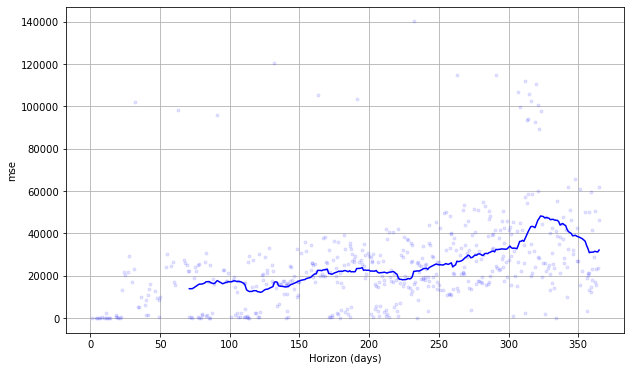

In [89]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mse')

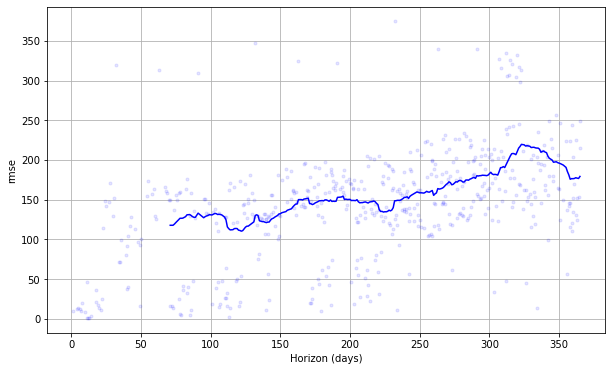

In [90]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')